# Aplikasi Pembelajaran Mesin: Mengklasifikasi spesies bunga Iris

Bagi pemula, memahami aplikasi pembelajaran mesin atau machine learning perlu dimulai dari hal yang sederhana. Salah satunya adalah dengan menggunakan data ukuran spesies bunga Iris.
Data tersebut terdiri dari ukuran helai mahkota bunga (petal), ukuran helai kelopak bunga (sepal) serta tiga spesies bunga iris.
Ketiga spesies tersebut adalah setosa, versicolor, dan virginica. Berikut gambar petal dan sepal bunga iris. 

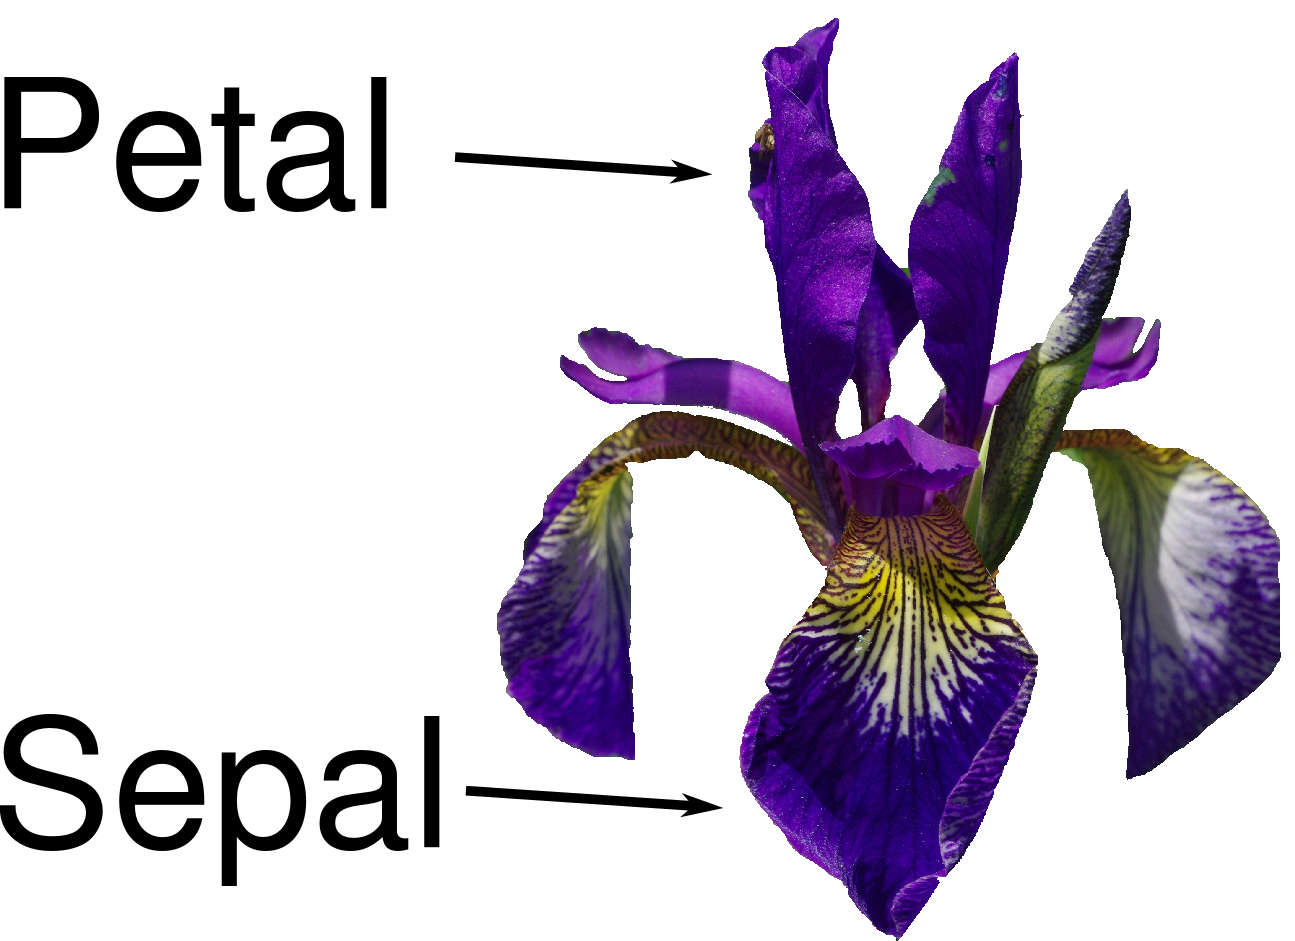

## Tujuan

Tujuan yang hendak dicapai adalah membangun model menggunakan ML dari data pengukuran
bunga iris yang spesiesnya sudah diketahui, sehingga kita dapat memperkirakan spesies dari
pengukuran data iris yang baru. Karena data tersebut sudah memuat informasi pengukuran serta
spesies iris-nya, maka masalah ini termasuk pembelajaran terawasi (supervised learning). Jika data tidak memuat informasi spesies iris-nya, maka masalah ini termasuk pembelajaran tak terawasi (unsupervised learning).

Dalam kasus ini, kita ingin memperkirakan spesies iris, dan ini merupakan masalah klasifikasi. Keluaran yang mungkin adalah spesies iris yang beragam yang biasa disebut kelas. Setiap data iris dalam kumpulan data termasuk dalam salahsatu kelas, yakni setosa, versicolor atau virginica, sehingga masalah ini termasuk klasifikasi tiga-kelas. Keluaran yang diinginkan untuk satu titik data iris adalah spesiesnya. Untuk titik data tertentu, nilai spesiesnya disebut label. Fitur data (selanjunya disebut data) adalah data pengukuran panjang dan lebar untuk petal dan sepal.

## Deskripsi data

Data iris sudah termasuk dalam modul scikit-learn dan dapat dipanggil menggunakan fungsi load_iris.

In [5]:
from sklearn.datasets import load_iris
dataset_iris = load_iris()

Data iris terdiri atas keys and values:

In [6]:
print("keys dari dataset_iris: \n{}".format(dataset_iris.keys()))

keys dari dataset_iris: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


Nilai dari keys DESCR merupakan deskripsi singkat dari iris dataset. Berikut adalah deskripsinya:

In [7]:
print(dataset_iris['DESCR'][:193]+"\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


nb: [:193] merupakan perintah untuk menampilkan deskripsi dalam 193 karakter.

Nilai dari keys target_names merupakan string array yang berisi spesies iris:

In [8]:
print("Target names:{}".format(dataset_iris['target_names']))
print("tipe target_names :",type(dataset_iris['target']))

Target names:['setosa' 'versicolor' 'virginica']
tipe target_names : <class 'numpy.ndarray'>


nb: tanda '{}' artinya nilai diganti dengan nilai setelah tanda '. (titik)'.

Keys target dibuat integer dari 0 sampai 2 dengan 0 untuk spesies setosa, 1 untuk versicolor, dan 2 untuk virginica. Nilai dari keys yang lainnya dapat dilihat dengan cara yang sama seperti cara diatas. Berikut ini 5 data teratasnya:

In [9]:
print(dataset_iris['feature_names'])
print(dataset_iris['data'][:5])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


## Data Latihan dan Test

Yang akan kita lakukan adalah membuat model yang dapat memprediksi spesies iris. Namun data yang ada tidak dapat digunakan sepenuhnya untuk membuat model tersebut, karena model yang dibuat akan mengingat data latihan yang dipakai untuk membuat model tersebut, dan tentunya akan memprediksi dengan tepat 100% setiap label dalam data latihan.

Untuk menilai kinerja model yang kita buat, aplikasikan model tersebut pada data baru (yang belum dipakai latihan). Biasanya data baru tersebut diperoleh dengan cara membagi data yang ada dalam dua bagian. Satu bagian data digunakan untuk membuat model atau disebut data latihan, sedangkan bagian lainnya disebut data test (test data/test set/hold-out set) yang digunakan untuk menilai kemampuan model. 

Scikit-learn mempunyai fungsi yang dapat digunakan untuk membagi kumpulan data dalam dua bagian tersebut, yakni fungsi 'train_test_split'. Pemilihan jumlah data untuk masing-masing bagian dapat dilakukan secara sembarang, namum pembagian 75-25 cukup bagus untuk dicoba. Di dalam fungsi scikit-learn data dinotasikan dengan X (huruf x besar), sedangkan label atau target (dalam kasus ini spesies iris) dinotasikan dengan y (huruf y kecil). Penggunaan notasi ini dipilih karena X merupakan data array dua dimensi (matrik, ada baris dan kolom) dan y merupakan data array satu dimensi (vektor, hanya ada satu baris).

Berikut adalah contoh pembagian data iris (75% data latihan dan 25% data test) menggunakan fungsi train_test_split di modul scikit-learn python: 

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset_iris['data'],dataset_iris['target'],random_state = 0)

Fungsi train_test_split mengacak data sehingga data test tidak hanya mempunyai satu jenis spesies iris saja tapi mengandung semua jenis iris. Untuk mendapatkan keluaran (output) yang sama saat menjalankan program berulang kali, atur random_state pada angka tertentu (dalam contoh ini nol). Random_state berfungsi sebagai seed atau bibit yang menghasilkan bilangan acak yang sama saat menjalankan program berulang kali. Ingat kembali: X_train merupakan matrik (dua dimensi) sedangkan y_train merupakan vektor (satu dimensi).

In [16]:
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


## Periksa Data

Sebelum membuat model ML, sangat disarankan untuk memeriksa data (data latihan). Manfaat pemeriksaan data diantaranya untuk mengetahui pencilan dan atau keitdaknormalan data serta untuk melihat informasi yang diharapkan terdapat dalam data atau tidak. Salah satu cara terbaik untuk memeriksa data adalah dengan membuat grafik atau visualisasinya misal dengan grafik scatter. Untuk membuat scatter plot, terlebih dahulu ubah tipe array menjadi pandas DataFrame untuk mempermudah.

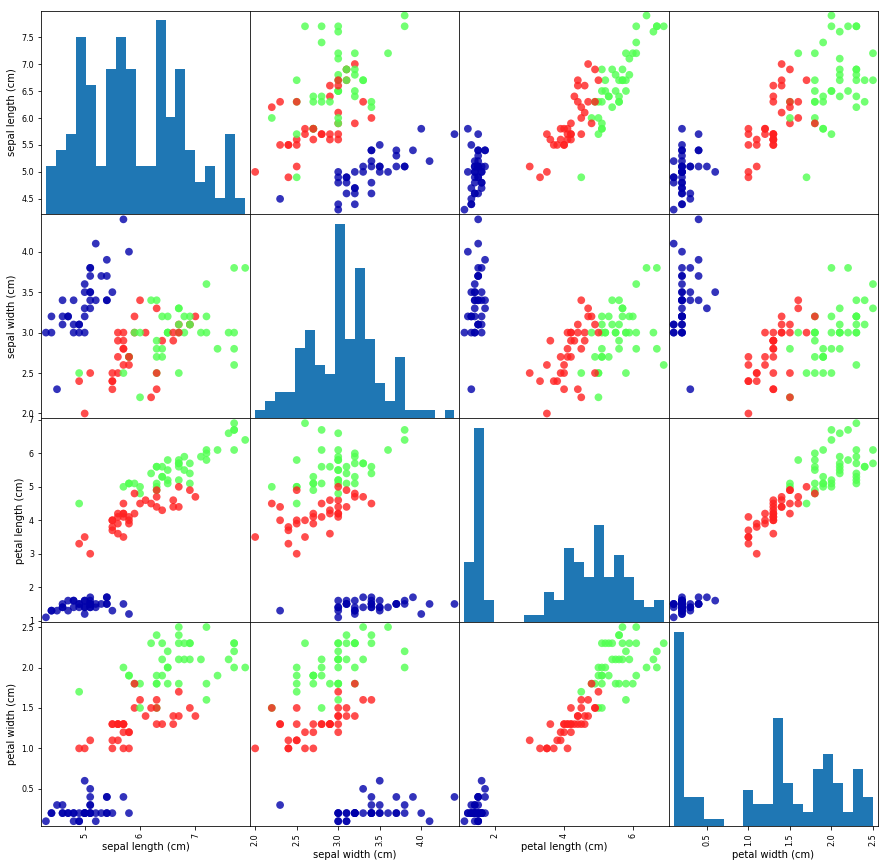

In [20]:
import pandas as pd
import mglearn
%matplotlib inline
# buat dataframe dari data X_train
# beri nama kolom menggunakan string dalam dataset_iris.feature_names
dataframe_iris = pd.DataFrame(X_train, columns = dataset_iris.feature_names)
# buat grafik scatter dari data dataframe, diwarnai berdasarkan data spesies iris (y_train)
grr = pd.plotting.scatter_matrix(dataframe_iris, c=y_train, figsize=(15,15), marker='o',hist_kwds={'bins':20},s=60,alpha=.8,cmap=mglearn.cm3)

Terlihat bahwa tiga kelas (tiga spesies iris) berkorelasi baik antar data pengukuran. Artinya, ML sepertinya dapat digunakan untuk membuat model klasifikasi. 

## Tahapan Membuat Prediksi

Setelah diperiksa, barulah kita dapat membuat model ML. Terdapat banyak algoritma klasifikasi yang dapat digunakan dalam scikit-learn. Untuk contoh ini kita akan menggunakan k-nearest neighbors classifier karena mudah untuk dipahami. Model ini hanya menyimpan data latihan. Untuk membuat prediksi untuk titik data baru, algoritma mencari titik data dalam data latihan yang paling dekat nilainya dengan data baru tersebut. Lalu label (tipe spesies iris) data latihan tersebut disematkan pada titik data baru itu. Huruf k pada algoritma k-nearest neighbors classifier menyatakan jumlah 'neighbors' atau titik-titik data terdekat (bisa 3,4,5 atau lebih), tidak hanya satu yang terdekat saja terhadap titik data baru. Prediksi dibuat berdasarkan kelas mayoritas dari titik-titik data terdekat tersebut. Namun untuk kasus ini, kita hanya mencari satu titik terdekat saja.

#### a. Definisikan objek

Semua model ML dalam scikit-learn diimplementasikan dalam kelas-kelas yang disebut Estimator Classes. Algoritma k-nearest diimplementasikan dalam kelas KNeighborsClassifier dalam modul neighbours. Definisikan kelas tersebut menjadi objek (yang diberi nama knn) yaitu saat kita memilih jumlah titik terdekat (untuk kasus ini adalah 1 titik terdekat). 

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

Objek knn merangkum algoritma yang akan digunakan untuk membuat model dari data latihan serta algoritma untuk membuat prediksi dari data baru. Selain itu, knn objek juga menyimpan informasi yang diekstrak dari data latihan.

#### b. Membuat Model

Untuk membuat model menggunakan data latihan, gunakan metode fit dalam objek knn yang meminta argumen X_train (data latihan)  dan y_train (data target latihan, dalam kasus ini spesies iris). 

In [31]:
knn.fit(X_train,y_train) #ini merupakan model ML k-nearest-nya.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Metode fit tidak memberikan informasi baru hanya menampilkan pilihan parameter. Parameter tersebut bernilai default kecuali n_neighbors yang sudah kita pilih sebelumnya. 

#### c. Membuat Prediksi

Sekarang kita dapat membuat prediksi menggunakan model yang sudah dibuat tadi. Misal, kita menemukan bunga iris dengan ukuran panjang sepal 5 cm, lebar sepal 2,9 cm, panjang petal 1 cm, dan lebar petal 0,2 cm. Termasuk spesies yang manakah iris tersebut? Simpan data ini dalam matriks numpy array yang harus berdimensi sama dengan data latihan yang digunakan dalam model, yakni 1x4 (satu sampel dengan 4 fitur). Scikit-learn juga selalu mengharapkan data dalam bentuk array 2 dimensi.

In [25]:
import numpy as np
X_new = np.array([[5,2.9,1,0.2]])
print('X_new.shape: {}'.format(X_new.shape))

X_new.shape: (1, 4)


Untuk membuat prediksi spesies data baru (X_new), panggil metode predict dalam objek knn:

In [27]:
prediksi = knn.predict(X_new)
print('Prediksi: {}'.format(prediksi))
print('Prediksi spesies: {}'.format(dataset_iris['target_names'][prediksi]))

Prediksi: [0]
Prediksi spesies: ['setosa']


Model yang telah kita buat memperkirakan data iris baru tersebut mempunyai spesies Setosa (nilai 0 adalah setosa). Tapi apakah hasil prediksi dari model ini dapat kita percaya? Kita tidak tahu spesies yang benar dari data baru tersebut. Hal tersebut lah yang mau kita cari jawabannya menggunakan model prediksi yang terpercaya tentunya. 

#### Evaluasi Model Prediksi

Pada tahap ini, data test yang akan digunakan. Data test tersebut belum sama sekalli dipakai saat membuat model prediksi. Akan tetapi di dalamnya sudah ada jawaban spesies yang benar untuk titik data tertentu. Oleh karena itu, kita dapat membuat prediksi spesies menggunakan data test tersebut. Lalu hasil prediksinya dibandingkan dengan label spesies yang benar, yang sudah diketahui sebelumnya.

Kita dapat mengukur kualitas kinerja model dengan menghitung akurasinya, yakni perbandingan spesies hasil prediksi dengan spesies sebenarnya:

In [28]:
y_pred = knn.predict(X_test)
print('Prediksi data target test: \n {}'.format(y_pred))

Prediksi data test: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [29]:
print('Score keakuratan prediksi data target test dibandingkan data target test sebenarnya: {:.2f}'.format(np.mean(y_pred==y_test)))

Score keakuratan prediksi data target test dibandingkan data target test sebenarnya: 0.97


Score akurasi dapat juga dihitung menggunakan metode score dalam objek knn: (metode ini tidak harus melewati metode knn.predict dulu)

In [30]:
print('Score data target test: {:.2f}'.format(knn.score(X_test,y_test)))

Score data target test: 0.97


Akurasi model yang dibuat untuk memprediksi spesies iris baru adalah 97%. Model ini termasuk yang mempunyai akurasi tinggi, sehingga model tersebut dapat dipercaya untuk digunakan. 

nb: Tulisan ini merupakan terjemah dari bagian buku Intro to ML with Python halaman 13-23 karya Muller (2016)

## SELESAI